# <center>Data Science and Business Analytics
## <center>Task-5 : Exploratory Data Analysis - Sports
### Name : Selvan Kumar M

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

import plotly_express as px

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Reading the dataset

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
deliveries.rename(columns={'match_id':'id'},inplace=True)

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Merging two datasets

In [6]:
ipl = pd.merge(left=matches, right=deliveries, on='id', how='right')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
print(matches.shape)
print(deliveries.shape)
print(ipl.shape)

(756, 18)
(179078, 21)
(179078, 38)


### Droping unwanted columns

In [8]:
ipl.drop(columns=['umpire1','umpire2','umpire3','player_dismissed','dismissal_kind','fielder'], inplace=True)

In [9]:
ipl.isnull().sum()

id                    0
season                0
city               1700
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
result                0
dl_applied            0
winner              372
win_by_runs           0
win_by_wickets        0
player_of_match     372
venue                 0
inning                0
batting_team          0
bowling_team          0
over                  0
ball                  0
batsman               0
non_striker           0
bowler                0
is_super_over         0
wide_runs             0
bye_runs              0
legbye_runs           0
noball_runs           0
penalty_runs          0
batsman_runs          0
extra_runs            0
total_runs            0
dtype: int64

### Statistics on data

In [10]:
ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
id,179078.0,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
season,179078.0,2013.444510,3.363947,2008.0,2011.0,2013.0,2016.0,2019.0
dl_applied,179078.0,0.017914,0.132639,0.0,0.0,0.0,0.0,1.0
win_by_runs,179078.0,13.404036,23.261007,0.0,0.0,0.0,19.0,146.0
win_by_wickets,179078.0,3.261579,3.347033,0.0,0.0,3.0,6.0,10.0
inning,179078.0,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
over,179078.0,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
is_super_over,179078.0,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0
wide_runs,179078.0,0.036721,0.251161,0.0,0.0,0.0,0.0,5.0


### No of seasons in IPL

In [11]:
tot_seasons = len(ipl['season'].unique())
print('Number of seasons played in ipl:',tot_seasons)

Number of seasons played in ipl: 12


### Number of matches in seasons

In [12]:
season1=matches['season'].value_counts()
season1.iplot(kind='bar',xTitle='Year', yTitle='No of matches',title='No of matches in year.',
         bargap=0.5,color='grey')

* Highest number of matches were held in the year 2013

### Cities in IPL data.

In [13]:
ipl.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

#### Top 10 cities in IPL history


In [14]:
matches.city.value_counts()[:10]

Mumbai        101
Kolkata        77
Delhi          74
Bangalore      66
Hyderabad      64
Chennai        57
Jaipur         47
Chandigarh     46
Pune           38
Durban         15
Name: city, dtype: int64

* Most of the matches were held in Mumbai city.

## No of matches played by each team in IPL.
### Concating team1 and team2 into a single column.

In [15]:
t1 = matches['team1']
t2= matches['team2']
team=[t1,t2]
team=pd.concat(team)
team

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755            Chennai Super Kings
Length: 1512, dtype: object

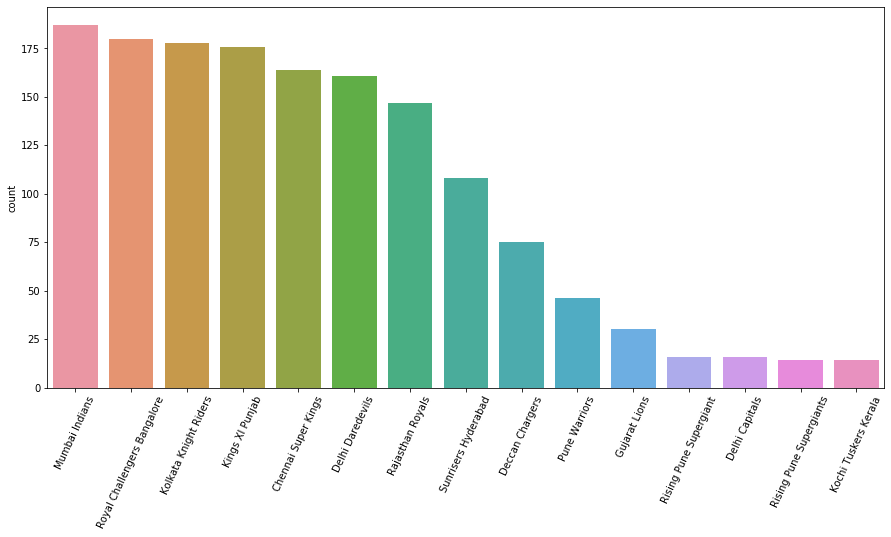

In [16]:
plt.figure(figsize=[15,7])
sns.countplot(team, order=team.value_counts().index);
plt.xticks(rotation=65);

* Mumbai Indians is the team that played maximum number of matches in IPL.

## Toss winning team.


In [17]:
toss = matches['toss_winner'].value_counts()
toss.iplot(kind='bar',xTitle='Team', yTitle='Tosses won',title='No of tosses won by teams.',
         bargap=0.5,color='black')

* Mumbai Indians is the team to win most number of tosses.

## Toss decision by venue

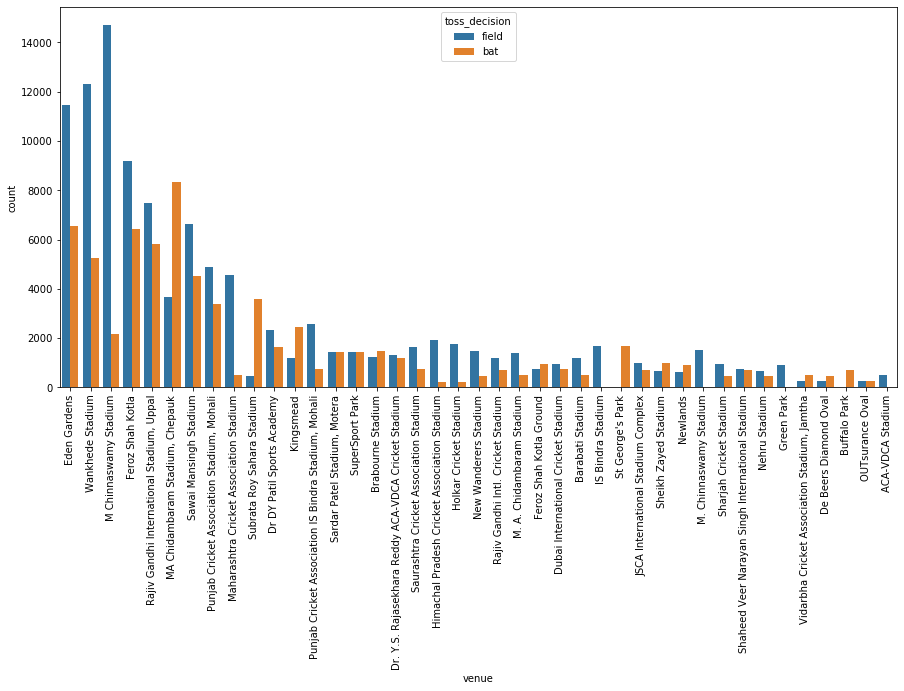

In [18]:
ipl['toss_decision'].value_counts()
plt.figure(figsize=[15,7])
sns.countplot(x=ipl['venue'], hue=ipl['toss_decision'], order=ipl['venue'].value_counts().index);
plt.xticks(rotation=90);

* <b>MA Chidhambaram Stadium</b> is mostly choosed for  <b>batting</b>.
* <b>M Chinnawamy Stadium</b> is mostly choosed for <b>fielding</b>.


## Teams and their winning counts

In [19]:
matches['winner'].value_counts().iplot(kind='bar',xTitle='Teams',yTitle='Matches won',title='No of matches won by teams')

* Mumbai Inidians is the team to win most number of matches.

# Datas in overs.

In [20]:
overs = deliveries.groupby(by='over').sum()
overs

,id,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
over,,,,,,,,,,,,
1,17111970,14598,35259,81,539,52,248,32,0,8535,871,9406
2,16735202,14248,34880,0,489,40,262,32,0,10139,823,10962
3,16764234,14122,34273,0,392,42,231,40,0,11413,705,12118
4,16678664,14062,34004,0,340,22,230,46,0,11769,638,12407
5,16621283,13997,33794,0,322,32,177,34,5,11856,570,12426
6,16492607,13966,33754,0,332,41,227,47,0,11865,647,12512
7,16450119,13895,33525,0,362,22,200,23,0,9476,607,10083
8,16434386,13858,33317,0,300,22,173,27,0,10215,522,10737
9,16431313,13814,33289,0,295,44,172,20,0,10596,531,11127


## Runs by overs.


In [21]:
overs.total_runs.iplot(kind='bar',xTitle='Overs', yTitle='Runs',title='Runs by overs',
         color='blue')

* Most number of runs are scored in powerplay & 16-18 overs.

## wides by overs.

In [22]:
overs.wide_runs.iplot(kind='line',xTitle='Overs', yTitle='Wide Runs',title='Wide runs by overs',
         color='blue')

* Most number of wide runs are given in first 3 overs.

## Man of the match
### Best player in IPL

In [23]:
player = matches['player_of_match'].value_counts()[:15]
player.iplot(kind='bar',xTitle='Player Name',yTitle='No of matches',title='Best Player in IPL.', color='green')

* <b>Chris Gayle</b> has won  the most number of <b>Player of the match</b> awards in IPL seasons.

# Summary

* Number of seasons played in IPL is  12.
* Highest number of matches were held in the year 2013.
* Most of the matches were held in Mumbai city.
* <b>Mumbai Indians</b> is the team that <b>played maximum number of matches</b> in IPL.
* <b>Mumbai Indians</b> is the team to <b>win most number of tosses.</b>
* <b>Mumbai Inidians</b> is the team to <b>win more number of matches</b> than other teams.
* Toss Decision:
     * <b>MA Chidhambaram Stadium</b> is mostly choosed for  <b>batting.</b>
     * <b>M Chinnawamy Stadium</b> is mostly choosed for <b>fielding.</b>
* More <b>runs</b> are scored in <b>powerplay & 16-18 overs.</b>
* Most number of <b>wide</b> runs are given in <b>first 3 overs.</b>
* <b>Chris Gayle</b> has won  the most number of <b>Player of the match</b> awards in IPL seasons.